# Importing important libraries

In [17]:
from roucy_dumpfileparser import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import log_parser
import seaborn as sns
from matplotlib import animation
import time
import itertools
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

# Naming Variables and reading files

In [18]:
name='coated'
upper_half='upper_half_seed1'
logfile='log_seed1.Pt_shape'
file_disquare='di_square_seed1'
dislocation='dislocation_count_seed1_smallpart'
pt = 0 # starting file pointer, leave as 0
timestep = getfirsttimestep(file_disquare) # initial timestep
timestep

0

# Reading Disquare File generated from Ovito

In [19]:
timestep = getfirsttimestep(file_disquare) # initial timestep
dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
runtime  = 10000000 # corresponds to the run time used to make the dumpfile
time2=[]
di_sqr=[]

start_time = time.time()


while timestep <= runtime:
    data, pt = parsedumpfile(file_disquare, pt)
    time2.append(timestep)
    di_sqr.append(np.average(data['NonaffineSquaredDisplacement']))
    
    end_time = time.time()
    elapsed_time = end_time - start_time
#     print(timestep)
    
    timestep += dumpfreq # update timestep 
    
# print(data.keys())
# print(time2)
# print(di_sqr)

# Plotting the graph

(0.0, 6.0)

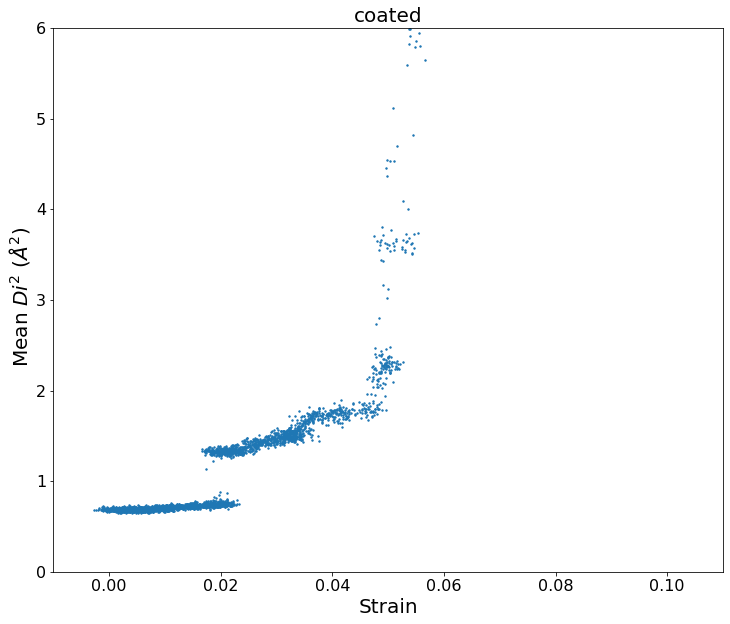

In [7]:
plt.figure(figsize=(12, 10))

plt.scatter(displacement_300k[2:],di_sqr[2:],s=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Strain',fontsize=20)
plt.ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20)
plt.title('{}'.format(name),fontsize=20)
plt.xlim(-.01,0.11)
plt.ylim(0,6)


# plt.savefig('Di_squared_{}.jpg'.format(name),dpi=300, bbox_inches='tight')


# Importing Dislocation file generated from Ovito

In [12]:
df=pd.read_csv(dislocation,header=None,names=['dislocation-count'])
dislocation_count=df['dislocation-count'].to_list()

cumulative_sum = list(itertools.accumulate(dislocation_count))
print(len(cumulative_sum))

4000


# Plotting Di square vs Dislocation on same graph

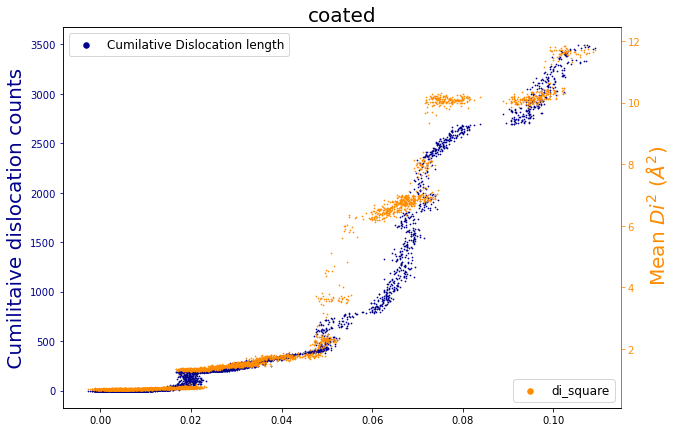

In [13]:

x=displacement_300k[2:4000]
y1=cumulative_sum[2:4000]
y2=di_sqr[2:4000]
fig,ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()


curve1=ax1.scatter(x,y1,label='Cumilative Dislocation length',color='darkblue',s=.5)
curve2=ax2.scatter(x,y2,label='di_square',color='darkorange',s=.5)
ax1.set_ylabel(' Cumilitaive dislocation counts ' ,fontsize=20,color='darkblue')
ax2.set_ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20,color='darkorange')

ax1.tick_params(axis='y', colors='darkblue')
ax2.tick_params(axis='y', colors='darkorange')

ax2.spines['left'].set_color('darkblue') 
ax2.spines['right'].set_color('darkorange') 

ax1.legend(loc='upper left',fontsize=12)
ax2.legend(loc='lower right',fontsize=12)
plt.title(name,fontsize=20)



# Plot legend.
lgnd1 = ax1.legend(loc="upper left", scatterpoints=1, fontsize=12)
lgnd1.legendHandles[0]._sizes = [30]

lgnd2 = ax2.legend(loc="lower right", scatterpoints=1, fontsize=12)
lgnd2.legendHandles[0]._sizes = [30]